In [21]:
import pandas as pd

In [22]:
path: str = 'mid-field-monitoring-data-feb-2014-to-dec-2023.csv'

# import a csv file from the df folder
df = pd.read_csv(path)

In [23]:

# Display the first few rows of the dataset
df.head()

,_id,Description,Sample Description,Sample No.,Date Sample Collected,Comments,Sample Matrix Code,Sample Matrix,Sample Type (comp./grab),Sample Collected by,...,Chloro-a Phenophytin ratio,BOD5,Suspended Solids,Organic Carbon - Total,Ammonia as N,Nitrate + Nitrite as N,Phosphate as P,Total Nitrogen as N,Total Phosphorus as P,TKN as N (TN-NOX)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,BOD,SUSPENDED_SOLI,TOC,AMMONIA_N,NOX,ORTHO_P,TN_PERSULPHATE,TP_PERSULPHATE,TKN
1,2,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ratio,mg/L,mg/L,mg/L C,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L
2,3,PQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2,0.5,0.005,0.005,0.005,0.01,0.01,0.01
3,4,Method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CM37,CM02,CM12,CM36,CM22,CM22,CM22,CM23,CM23,CM23
4,5,North Pine Mid-Field Monitoring,MFMP 1 - Surface,1.0,2014-02-20T00:00:00,NaN,NaN,NaN,Grab,Sampler 1,...,1.1,<3,18,13,<0.005,<0.005,0.068,0.43,0.12,0.43


In [24]:
# Display a concise summary of the DataFrame
print("\nDataframe Info:")
df.info()


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         1874 non-null   int64  
 1   Description                 1873 non-null   object 
 2   Sample Description          1870 non-null   object 
 3   Sample No.                  1870 non-null   float64
 4   Date Sample Collected       1870 non-null   object 
 5   Comments                    37 non-null     object 
 6   Sample Matrix Code          1539 non-null   object 
 7   Sample Matrix               1539 non-null   object 
 8   Sample Type (comp./grab)    1870 non-null   object 
 9   Sample Collected by         1870 non-null   object 
 10  Time Sample Collected       1870 non-null   object 
 11  Temperature                 1872 non-null   object 
 12  Dissolved Oxygen            1874 non-null   object 
 13  pH              

In [25]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
_id                              0
Description                      1
Sample Description               4
Sample No.                       4
Date Sample Collected            4
Comments                      1837
Sample Matrix Code             335
Sample Matrix                  335
Sample Type (comp./grab)         4
Sample Collected by              4
Time Sample Collected            4
Temperature                      2
Dissolved Oxygen                 0
pH                               0
E.Cond.                          0
Secchi Depth                   884
Salinity (Field)                 0
E. coli                        874
Thermotolerant coliforms       874
Intestinal enterococci         874
Chlorophyll a                  875
Chloro-a Phenophytin ratio     886
BOD5                            20
Suspended Solids               875
Organic Carbon - Total          26
Ammonia as N                     0
Nitrate + Nitrite as N           0
Phosphate as P         

In [26]:
# Generate descriptive statistics
print("\nDescriptive Statistics for numerical features:")
print(df.describe())


Descriptive Statistics for numerical features:
               _id   Sample No.
count  1874.000000  1870.000000
mean    937.500000     8.944385
std     541.121521     4.885211
min       1.000000     1.000000
25%     469.250000     5.000000
50%     937.500000     9.000000
75%    1405.750000    13.000000
max    1874.000000    17.000000


In [27]:
# Check the distribution of categorical df
if df.select_dtypes(include=['object']).empty == False:
    print("\nValue counts for categorical columns:")
    for column in df.select_dtypes(include=['object']).columns:
        print(f"\nValue counts for {column}:")
        print(df[column].value_counts())


Value counts for categorical columns:

Value counts for Description:
Description
North Pine Mid-Field Monitoring    1870
Units                                 1
PQL                                   1
Method                                1
Name: count, dtype: int64

Value counts for Sample Description:
Sample Description
MFMP 1 - Surface         111
MFMP 4 - Surface         111
MFMP 9 - STP Effluent    111
MFMP 1 - 1.5m            111
MFMP 5 - Surface         111
MFMP 4 - 1.5m            111
MFMP 5 - 1.5m            111
MFMP 3 - 1.5m            111
MFMP 3 - Surface         111
MFMP 2 - 1.5m            111
MFMP 2 - Surface         111
MFMP 6 - Surface         110
MFMP 6 - 1.5m            110
MFMP 7 - Surface         110
MFMP 7 - 1.5m            110
MFMP 8 - Surface         110
MFMP 8 - 1.5m             94
MFMP 8 - 1.0m              5
Name: count, dtype: int64

Value counts for Date Sample Collected:
Date Sample Collected
2014-02-20T00:00:00    17
2021-07-15T00:00:00    17
2021-05-26T0

## Data Cleaning

In [28]:
column_names = df.columns.tolist()
print(column_names)

['_id', 'Description', 'Sample Description', 'Sample No.', 'Date Sample Collected', 'Comments', 'Sample Matrix Code', 'Sample Matrix', 'Sample Type (comp./grab)', 'Sample Collected by', 'Time Sample Collected', 'Temperature', 'Dissolved Oxygen', 'pH', 'E.Cond.', 'Secchi Depth', 'Salinity (Field)', 'E. coli', 'Thermotolerant coliforms', 'Intestinal enterococci', 'Chlorophyll a', 'Chloro-a Phenophytin ratio', 'BOD5', 'Suspended Solids', 'Organic Carbon - Total', 'Ammonia as N', 'Nitrate + Nitrite as N', 'Phosphate as P', 'Total Nitrogen as N', 'Total Phosphorus as P', 'TKN as N (TN-NOX)']


In [29]:
# List of columns to drop
columns_to_drop = ['_id', 'Description', 'Sample Description', 'Sample No.','E.Cond.','Thermotolerant coliforms', 'Comments', 'Sample Matrix Code', 'Intestinal enterococci', 'BOD5','Ammonia as N', 'Nitrate + Nitrite as N','Sample Matrix', 'Sample Type (comp./grab)', 'Sample Collected by']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [30]:
df.head()

,Date Sample Collected,Time Sample Collected,Temperature,Dissolved Oxygen,pH,Secchi Depth,Salinity (Field),E. coli,Chlorophyll a,Chloro-a Phenophytin ratio,Suspended Solids,Organic Carbon - Total,Phosphate as P,Total Nitrogen as N,Total Phosphorus as P,TKN as N (TN-NOX)
0,NaN,NaN,TEMPERATURE,DO,PH,NaN,Salinity (Field),ECOLI,CHLOROPHYLL_A,NaN,SUSPENDED_SOLI,TOC,ORTHO_P,TN_PERSULPHATE,TP_PERSULPHATE,TKN
1,NaN,NaN,oC,mg/L,pH Units,m,ppt,cfu/100mL,ug/L,ratio,mg/L,mg/L C,mg/L,mg/L,mg/L,mg/L
2,NaN,NaN,NaN,0.1,2,NaN,0.1,1,1,NaN,2,0.5,0.005,0.01,0.01,0.01
3,NaN,NaN,FM10,FM02,FM03,FM12 *,FM07,MM02,CM37,CM37,CM12,CM36,CM22,CM23,CM23,CM23
4,2014-02-20T00:00:00,07:45:00,28.9,5.7,7.6,0.8,31.1,5 EST,7.5,1.1,18,13,0.068,0.43,0.12,0.43


In [31]:
# Drop the first four rows of actual data (now indices 0 to 3)
df = df.drop([0, 1, 2, 3])

In [32]:
df.head()

,Date Sample Collected,Time Sample Collected,Temperature,Dissolved Oxygen,pH,Secchi Depth,Salinity (Field),E. coli,Chlorophyll a,Chloro-a Phenophytin ratio,Suspended Solids,Organic Carbon - Total,Phosphate as P,Total Nitrogen as N,Total Phosphorus as P,TKN as N (TN-NOX)
4,2014-02-20T00:00:00,07:45:00,28.9,5.7,7.6,0.8,31.1,5 EST,7.5,1.1,18,13,0.068,0.43,0.12,0.43
5,2014-02-20T00:00:00,07:55:00,29,5,7.7,0,32.2,NaN,NaN,NaN,NaN,14,NaN,0.39,NaN,0.39
6,2014-02-20T00:00:00,08:13:00,28.9,4.7,7.6,0.8,30.8,5 EST,7.5,1.1,27,12,0.078,0.42,0.13,0.42
7,2014-02-20T00:00:00,08:20:00,29.2,4.6,7.6,0,31.1,NaN,NaN,NaN,NaN,14,NaN,0.39,NaN,0.39
8,2014-02-20T00:00:00,08:40:00,29.2,4.2,7.5,0.8,29.2,8 EST,8.5,1.1,25,16,0.087,0.43,0.14,0.43


In [33]:
clean_df = df.dropna()
print(clean_df.isnull().sum())

Date Sample Collected         0
Time Sample Collected         0
Temperature                   0
Dissolved Oxygen              0
pH                            0
Secchi Depth                  0
Salinity (Field)              0
E. coli                       0
Chlorophyll a                 0
Chloro-a Phenophytin ratio    0
Suspended Solids              0
Organic Carbon - Total        0
Phosphate as P                0
Total Nitrogen as N           0
Total Phosphorus as P         0
TKN as N (TN-NOX)             0
dtype: int64


In [34]:
clean_df.head()

,Date Sample Collected,Time Sample Collected,Temperature,Dissolved Oxygen,pH,Secchi Depth,Salinity (Field),E. coli,Chlorophyll a,Chloro-a Phenophytin ratio,Suspended Solids,Organic Carbon - Total,Phosphate as P,Total Nitrogen as N,Total Phosphorus as P,TKN as N (TN-NOX)
4,2014-02-20T00:00:00,07:45:00,28.9,5.7,7.6,0.8,31.1,5 EST,7.5,1.1,18,13,0.068,0.43,0.12,0.43
6,2014-02-20T00:00:00,08:13:00,28.9,4.7,7.6,0.8,30.8,5 EST,7.5,1.1,27,12,0.078,0.42,0.13,0.42
8,2014-02-20T00:00:00,08:40:00,29.2,4.2,7.5,0.8,29.2,8 EST,8.5,1.1,25,16,0.087,0.43,0.14,0.43
10,2014-02-20T00:00:00,09:00:00,29.4,5.4,7.5,0.9,28.5,6 EST,7.5,1.1,29,13,0.084,0.44,0.14,0.44
12,2014-02-20T00:00:00,09:40:00,29.5,6.9,7.5,0.9,27.4,10,12,1.1,21,14,0.13,0.47,0.19,0.47


In [35]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 4 to 1871
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date Sample Collected       869 non-null    object
 1   Time Sample Collected       869 non-null    object
 2   Temperature                 869 non-null    object
 3   Dissolved Oxygen            869 non-null    object
 4   pH                          869 non-null    object
 5   Secchi Depth                869 non-null    object
 6   Salinity (Field)            869 non-null    object
 7   E. coli                     869 non-null    object
 8   Chlorophyll a               869 non-null    object
 9   Chloro-a Phenophytin ratio  869 non-null    object
 10  Suspended Solids            869 non-null    object
 11  Organic Carbon - Total      869 non-null    object
 12  Phosphate as P              869 non-null    object
 13  Total Nitrogen as N         869 non-null    object
 14

In [36]:
rel_output_file_path: str = "../../api/db/data/unity_water_mid-field_monitoring_data.csv"
clean_df.to_csv(rel_output_file_path, index=False)

In [37]:
data = clean_df
for column in data.columns:
    if data[column].dtype == 'object':
        # Try converting to numeric, coercing errors to NaN
        temp = pd.to_numeric(data[column], errors='coerce')
        # Check if there are any non-convertible values
        if temp.isna().any():
            print(f"Non-numeric values found in {column}:")
            print(data[column][temp.isna()])

Non-numeric values found in Date Sample Collected:
4       2014-02-20T00:00:00
6       2014-02-20T00:00:00
8       2014-02-20T00:00:00
10      2014-02-20T00:00:00
12      2014-02-20T00:00:00
               ...         
1863    2023-12-13T00:00:00
1865    2023-12-13T00:00:00
1867    2023-12-13T00:00:00
1869    2023-12-13T00:00:00
1871    2023-12-13T00:00:00
Name: Date Sample Collected, Length: 869, dtype: object
Non-numeric values found in Time Sample Collected:
4       07:45:00
6       08:13:00
8       08:40:00
10      09:00:00
12      09:40:00
          ...   
1863    12:31:00
1865    12:57:00
1867    13:17:00
1869    13:45:00
1871    14:21:00
Name: Time Sample Collected, Length: 869, dtype: object
Non-numeric values found in Secchi Depth:
589    [NT]
591    [NT]
593    [NT]
595    [NT]
597    [NT]
599    [NT]
601    [NT]
603    [NT]
Name: Secchi Depth, dtype: object
Non-numeric values found in E. coli:
4       5 EST
6       5 EST
8       8 EST
10      6 EST
16      3 EST
        ... 

In [38]:
# Convert columns to their appropriate data types, e.g., numeric columns
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    except ValueError:
        continue  # Skip conversion if it's a non-numeric column


C:\Users\61490\AppData\Local\Temp\ipykernel_5612\1832605817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = pd.to_numeric(data[column], errors='coerce')


In [39]:
import matplotlib.pyplot as plt

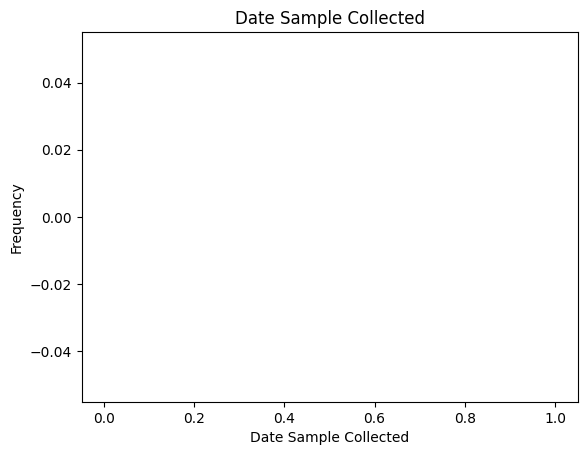

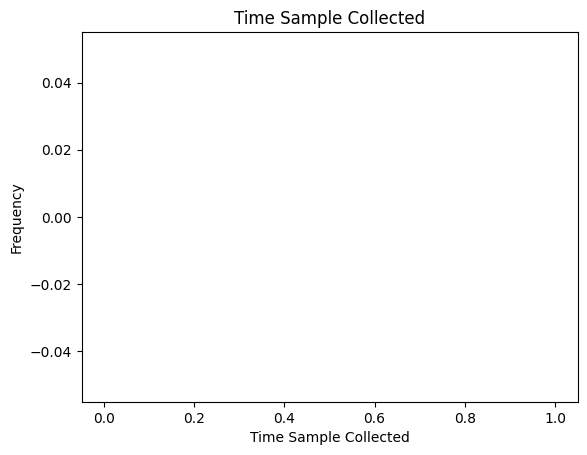

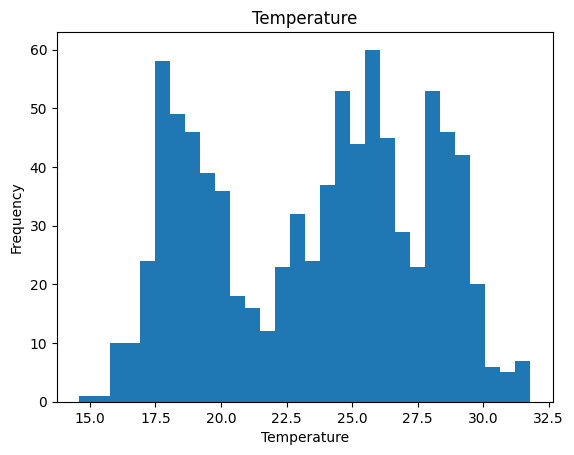

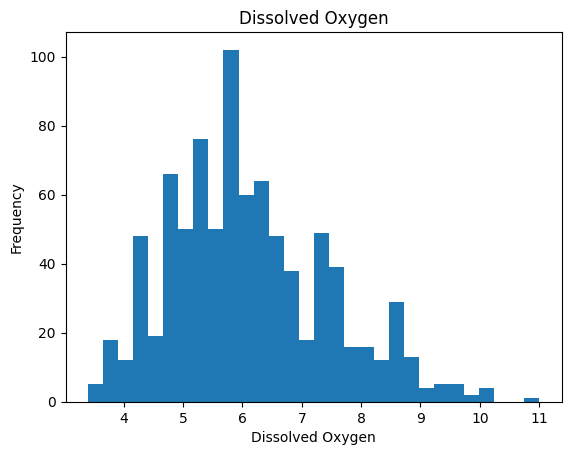

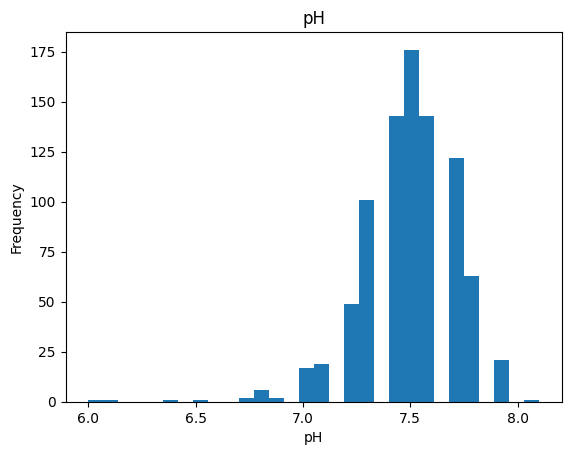

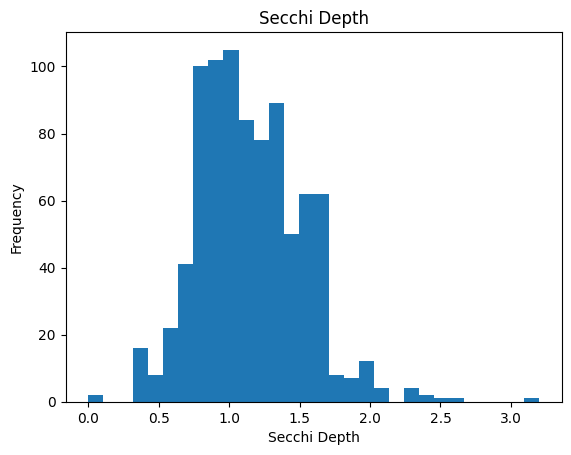

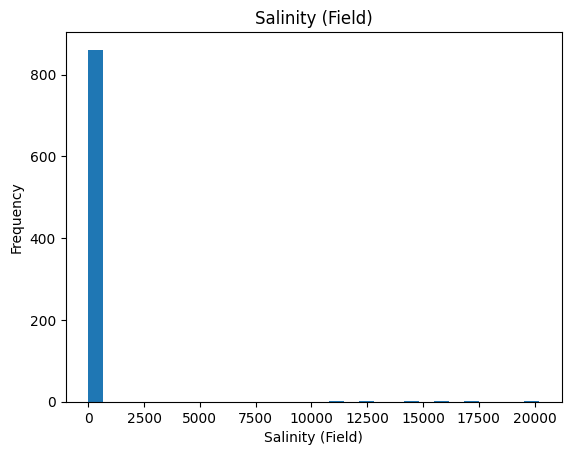

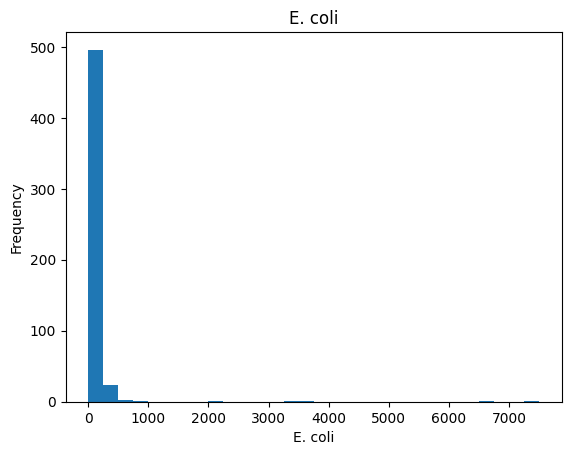

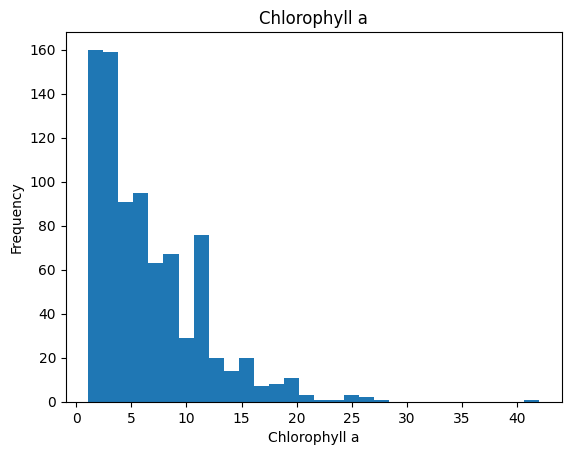

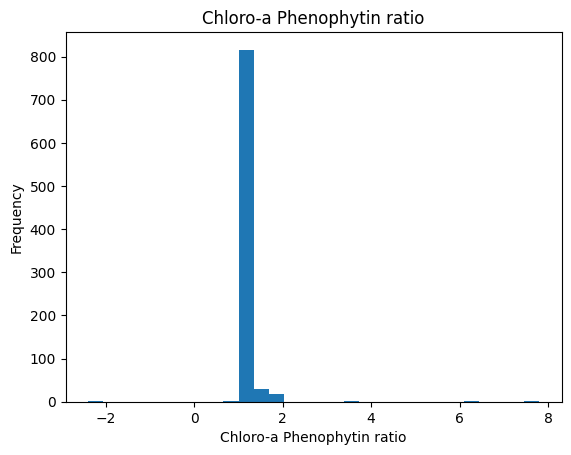

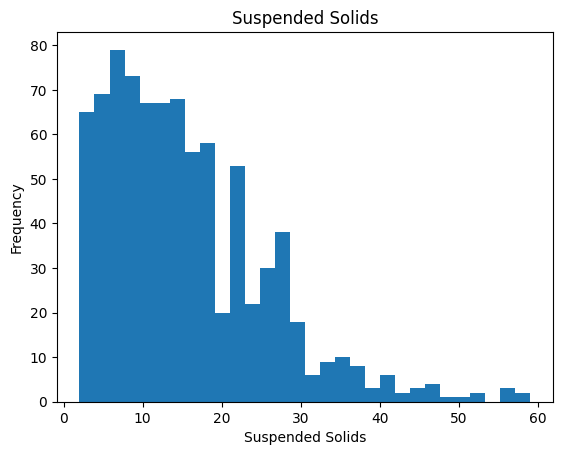

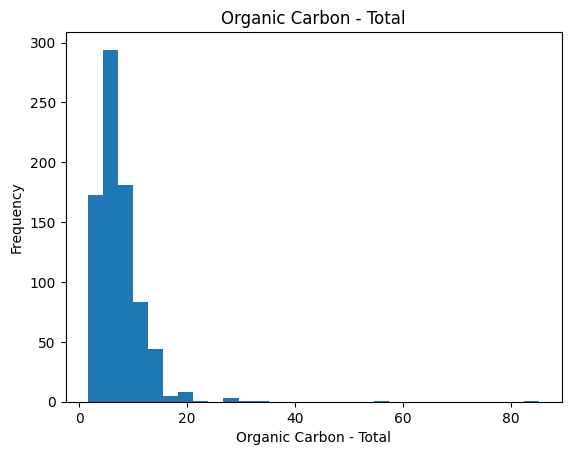

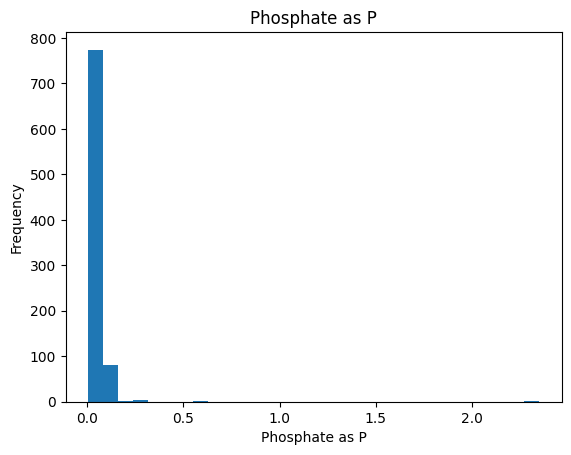

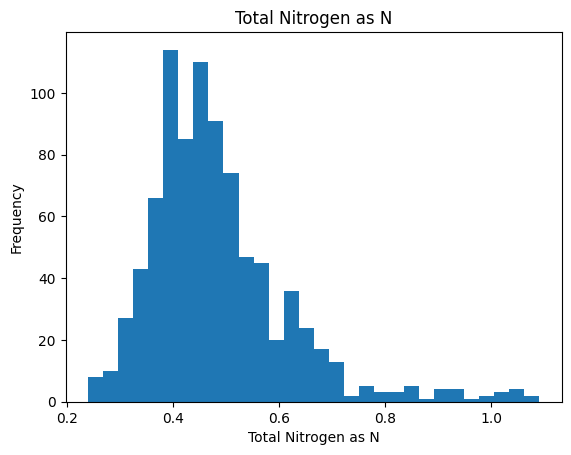

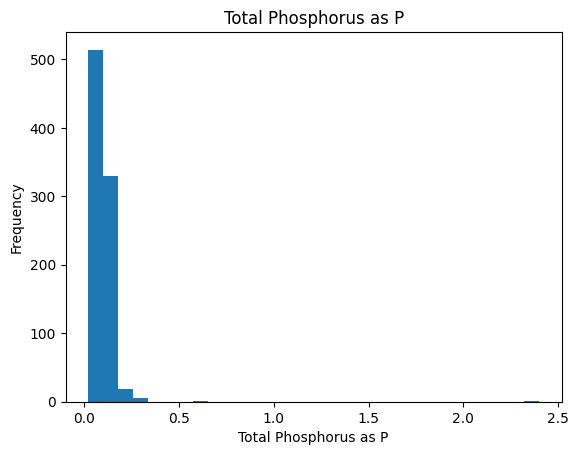

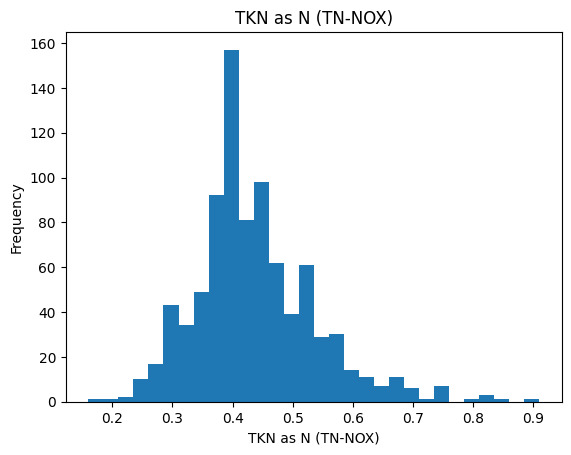

In [40]:

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.figure()  # Create a new figure for each plot
        data[column].plot(kind='hist', bins=30, title=column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()